# DBSCAN이란?
DBSCAN은 Density-Based Spatial Clustering of Applications with Noise의 줄임말입니다. 영어 표현 그대로 밀도 기반 클러스터링 방법인데요.   
DBSCAN의 전제: 어떤 데이터가 특정 클러스터에 속할 경우, 클러스터 내의 다른 데이터들과 가까운 위치에 있어야 한다.

이 두 가지는 모델 학습 시 임의로 지정해 줘야 하는 값입니다. 얼마나 가까운 위치에 데이터가 있어야 하는지 나타내는 반경(Radius), 반경 내에 얼마나 많은 데이터가 있어야 하는지를 나타내는 최소 데이터 개수(Minimum Points)를 어떻게 지정해 주느냐에 따라 결과가 달라집니다.

#### DBSCAN의 클러스터링 진행 과정
1. 특정 데이터에서 지정한 반경 내에 몇 개의 데이터가 포함되는지 탐색합니다.
2. 정해진 반경 내에 최소 데이터 개수가 포함되면 하나의 클러스터로 묶습니다.
3. 만들어진 두 개의 클러스터의 경계에 있는 데이터들에서 그린 반경이 서로 겹치는 경우가 생길 수 있는데요. 그럴 경우에는 두 클러스터를 하나로 묶습니다.
4. 조건에 만족하지 못하고 어떠한 클러스터에도 포함되지 못한 데이터는 이상치(Outlier)가 됩니다.

<Axes: xlabel='0', ylabel='1'>

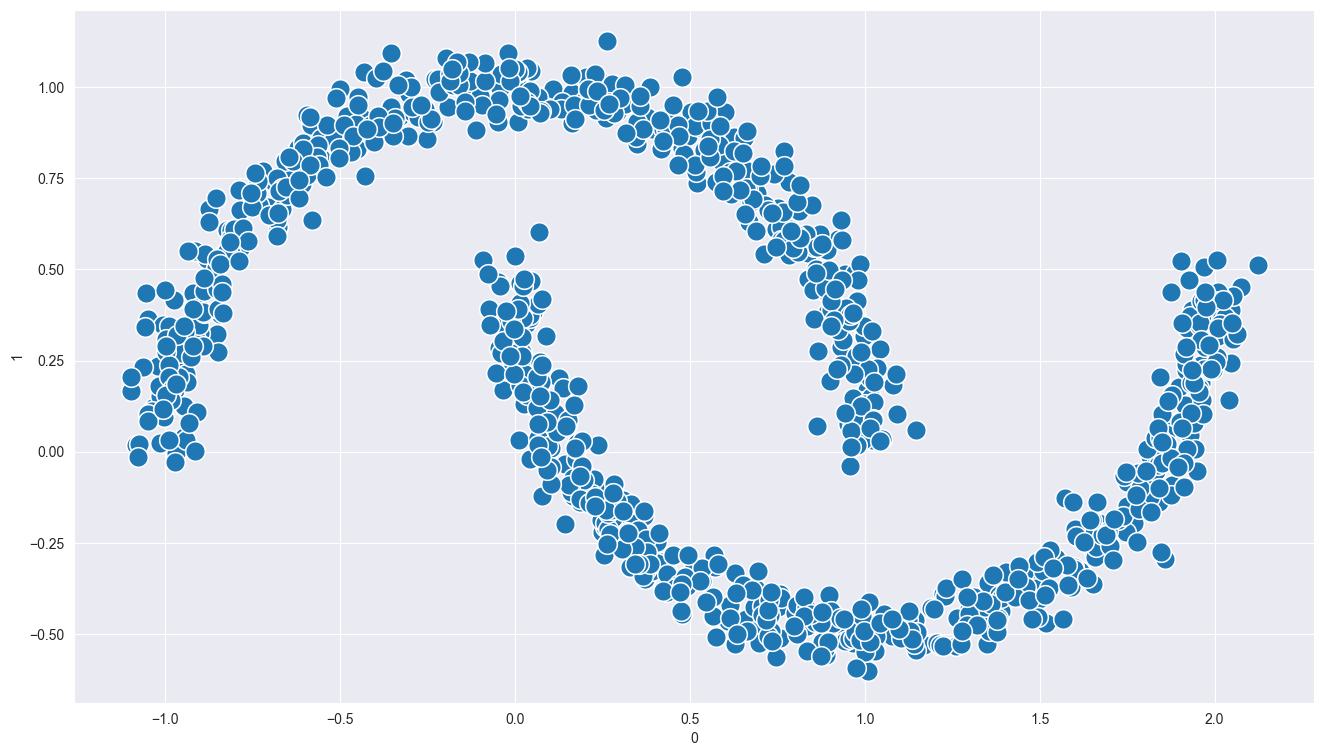

In [1]:
# sklearn의 데이터 세트인 make_moons 활용
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=.05)  # noise: 잡음의 크기. 0이면 정확한 반원을 이룸
df = pd.DataFrame(X)

#시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], marker='o', s=200)

이 데이터를 k-means와 DBSCAN 각각으로 클러스터링 해보고 결과를 비교

#### K-means

<Axes: xlabel='0', ylabel='1'>

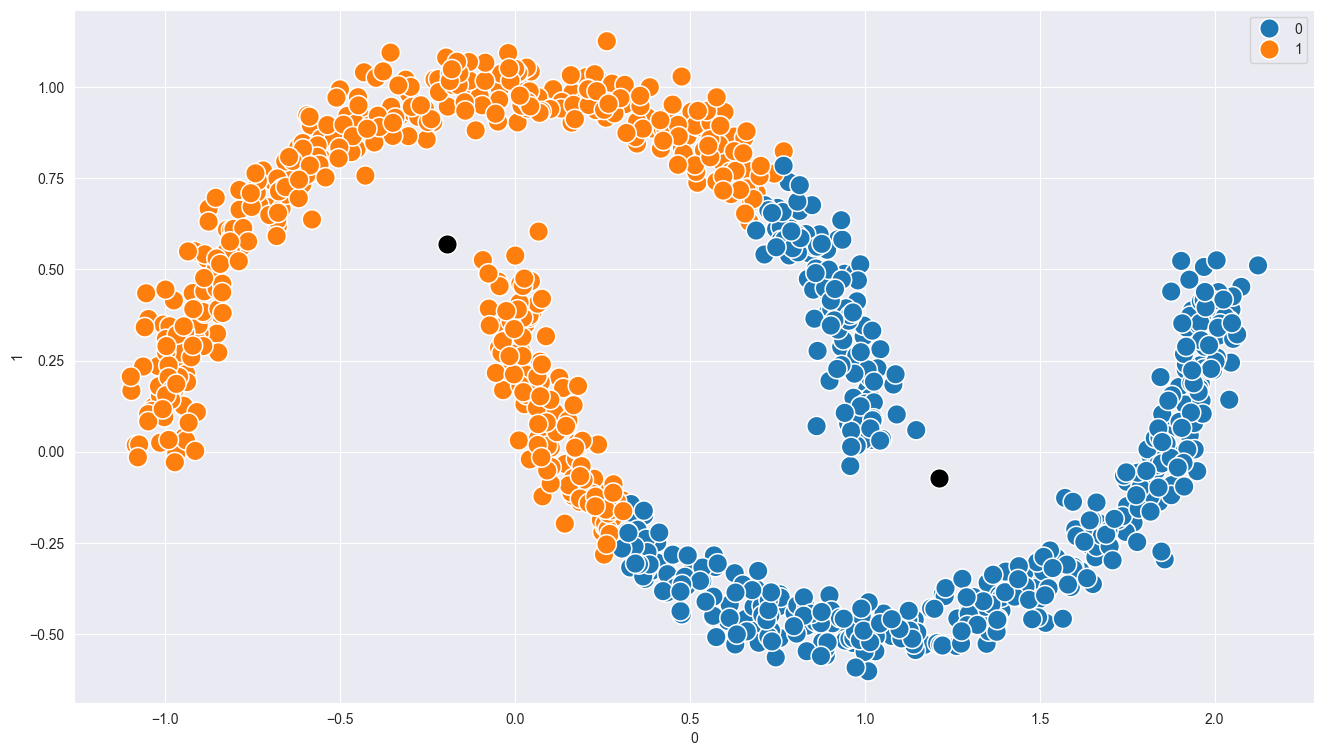

In [3]:
from sklearn.cluster import KMeans
# k-means 모델 학습
model = KMeans(n_clusters=2, random_state = 123)
model.fit(df)

# 클러스터 라벨링
df['kmeans_label'] = model.predict(df)

# 각 군집의 중심점
centers = model.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(16, 9))

sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'] , s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

#### DBSCAN

In [4]:
df = df.drop(columns=['kmeans_label'], axis=1)

<Axes: xlabel='0', ylabel='1'>

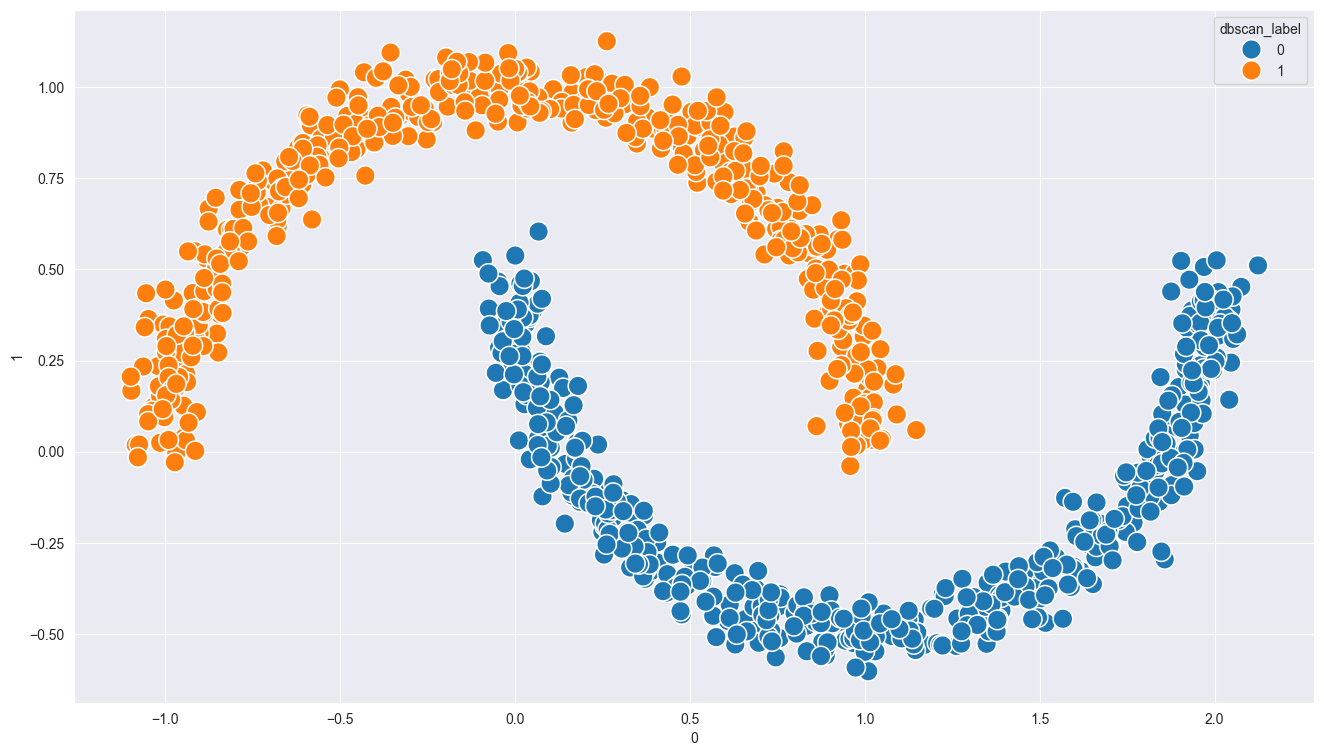

In [5]:
from sklearn.cluster import DBSCAN

eps = 0.1 # 반경
min_samples = 5 # 최소 데이터 갯수

# DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)

K-means는 Centroid를 중심으로 가까운 거리의 데이터가 같은 클러스터로 묶어 반달 모양으로 구분된 데이터의 특성이 잘 반영되지 못했지만 DBSCAN은 두 개의 반달 모양으로 잘 구분했습니다. 
DBSCAN은 기하학적인 분포의 데이터를 클러스터링하는데 유용하다는 것을 알 수 있습니다.